# Acessando a base de dados Original descompactada no Google Drive Pessoal

In [ ]:
#Abrindo as principais bibliotecas utilizadas no estudo
from collections import Counter #para contar a frequência das classes
import numpy as np #para manipulação de arrays
import pandas as pd
from matplotlib import pyplot as plt

#Montando o drive virtual para acesso ao Google Drive pessoal
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path = '/content/drive/MyDrive/Colab Notebooks/datasets/acidentes.csv'
#Carregando o dataframe completo com os registros de acidentes entre 2017 e 2019
df_original = pd.read_csv(data_path, sep=";", encoding='utf8')

print(df_original.head()) #Relaciona os 5 primeiros registros

print("\nA base de dados original possui a quantidade total de registros:", (f'{len(df_original):,}').replace(',','.'))


Mounted at /content/drive
      Nome da Origem    id   pesid data_inversa dia_semana   horario  uf  \
0  acidentes2017.csv   8.0     1.0   2017-01-01    domingo  00:00:00  PR   
1  acidentes2017.csv   9.0   955.0   2017-01-01    domingo  00:01:00  SC   
2  acidentes2017.csv  11.0     3.0   2017-01-01    domingo  00:00:00  PR   
3  acidentes2017.csv  11.0     2.0   2017-01-01    domingo  00:00:00  PR   
4  acidentes2017.csv  12.0  1499.0   2017-01-01    domingo  00:00:00  GO   

      br    km                 municipio  ...       sexo ilesos feridos_leves  \
0  376.0   112                 PARANAVAI  ...  Masculino      0             0   
1  101.0   234                   PALHOCA  ...  Masculino      1             0   
2  153.0  56,9  SANTO ANTONIO DA PLATINA  ...  Masculino      0             1   
3  153.0  56,9  SANTO ANTONIO DA PLATINA  ...   Feminino      0             1   
4  153.0   435                  ANAPOLIS  ...  Masculino      0             0   

  feridos_graves mortos      l

# Seleção dos dados
A partir da base original, faremos a seleção apenas das ocorrências do ano de 2017 e salvaremos um novo dataset.

In [ ]:
#Novo dataframe somente com a seleção de acidentes no ano de 2017
df_acidentes2017 = df_original[(df_original['Nome da Origem'] == 'acidentes2017.csv')]

# Filtra o DataFrame para incluir apenas registros com valores não nulos na coluna 'br'
df_acidentes2017 = df_acidentes2017.dropna(subset=['br'])

#Removendo as colunas não necessárias ao estudo
df_acidentes2017 = df_acidentes2017.drop(columns=['Nome da Origem', 'pesid', 'sentido_via',
                                                  'idade', 'uso_solo', 'id_veiculo', 'tipo_veiculo',
                                                  'latitude', 'longitude', 'marca', 'ano_fabricacao_veiculo', 'tipo_envolvido',
                                                   'regional', 'delegacia', 'uop'])

# Convertendo a coluna 'id' para inteiro. Trata valores não numéricos.
df_acidentes2017['id'] = pd.to_numeric(df_acidentes2017['id'], errors='coerce').astype('Int64')

# Convertendo a coluna 'km' para float. Trata valores não numéricos.
df_acidentes2017['km'] = pd.to_numeric(df_acidentes2017['km'].str.replace(',', '.'), errors='coerce')

# Convertendo a coluna 'br' para string e acrescentando "BR-"
df_acidentes2017['br'] = 'BR-' + df_acidentes2017['br'].astype(str)
# Removendo os dois últimos caracteres da coluna 'br'
df_acidentes2017['br'] = df_acidentes2017['br'].str[:-2]

print(df_acidentes2017.head())
print("\nQuantidade total de registros para o ano de 2017:", (f'{len(df_acidentes2017):,}').replace(',','.'))


   id data_inversa dia_semana   horario  uf      br     km  \
0   8   2017-01-01    domingo  00:00:00  PR  BR-376  112.0   
1   9   2017-01-01    domingo  00:01:00  SC  BR-101  234.0   
2  11   2017-01-01    domingo  00:00:00  PR  BR-153   56.9   
3  11   2017-01-01    domingo  00:00:00  PR  BR-153   56.9   
4  12   2017-01-01    domingo  00:00:00  GO  BR-153  435.0   

                  municipio                           causa_acidente  \
0                 PARANAVAI                    Fenômenos da Natureza   
1                   PALHOCA              Falta de Atenção à Condução   
2  SANTO ANTONIO DA PLATINA                         Animais na Pista   
3  SANTO ANTONIO DA PLATINA                         Animais na Pista   
4                  ANAPOLIS  Avarias e/ou desgaste excessivo no pneu   

                  tipo_acidente  ...     fase_dia condicao_metereologica  \
0  Queda de ocupante de veículo  ...  Plena Noite                  Chuva   
1   Colisão com objeto estático  ...  Plen

In [ ]:
#Agrupar por Unidade Federativa e Rodovia para análise Descritiva
acidentes_por_uf = df_acidentes2017.groupby(['uf', 'br'])['id'].nunique().reset_index(name='quantidade_acidentes')

#Ordenar por 'quantidade_acidentes' em ordem descendente
acidentes_por_uf = acidentes_por_uf.sort_values(by='quantidade_acidentes', ascending=False)

# Exibe o resultado
import plotly.express as px
#Layout Treemap
fig = px.treemap(acidentes_por_uf, path=[px.Constant("Acidentes por estado e rodovia"), 'uf', 'br'], values='quantidade_acidentes')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), width=1100)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



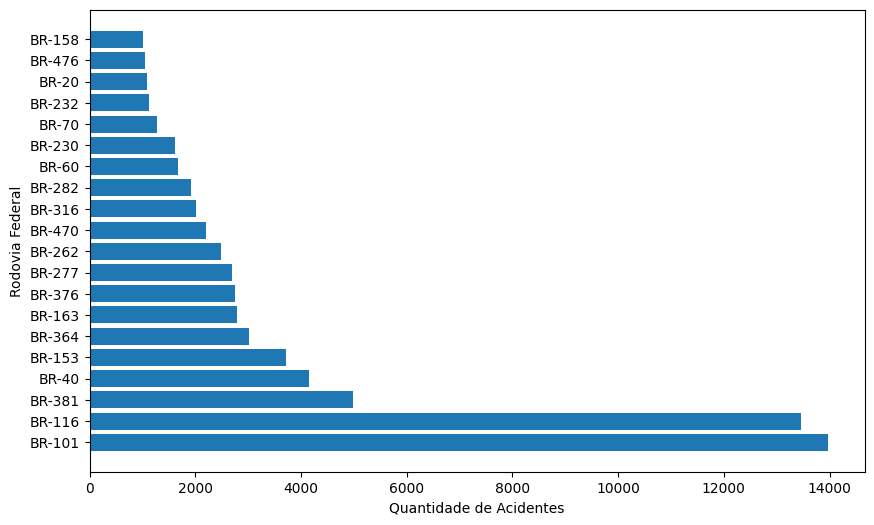

In [ ]:
#Agrupar por Rodovia Federal
acidentes_por_br = df_acidentes2017.groupby(['br'])['id'].nunique().reset_index(name='qtd_acidentes_br')

#Filtrar as 20 Rodovias com mais acidentes
acidentes_por_br = acidentes_por_br.nlargest(20, 'qtd_acidentes_br')

#Ordenar de forma descendente
acidentes_por_br = acidentes_por_br.sort_values(by='qtd_acidentes_br', ascending=False)

#Criar o gráfico de barras horizontais - Quantidade de Acidentes por Rodovia Federal em 2017
plt.figure(figsize=(10, 6))
plt.barh(acidentes_por_br['br'], acidentes_por_br['qtd_acidentes_br'])
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Rodovia Federal')
plt.show()

Centróides dos clusters:
[[ 0.65060425 -0.35161738]
 [-0.28787476  1.91385821]
 [-0.67954411 -0.37507129]]

Distribuição dos clusters:
cluster
0    41492
2    33698
1    14227
Name: count, dtype: int64


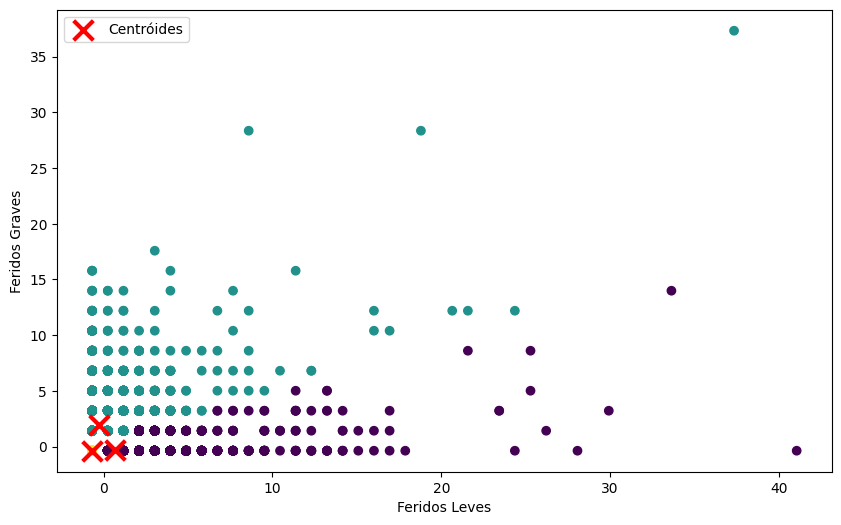

In [ ]:
#Análise por k-means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Agrupando o DataFrame por acidente e somando a quantidade de vítimas
df_agrupado = df_acidentes2017.groupby('id').agg(
    {'br' : 'first',
     'km' : 'first',
     'municipio' : 'first',
     'uf' : 'first',
     'causa_acidente' : 'first',
     'tipo_acidente' : 'first',
     'classificacao_acidente' : 'first',
     'fase_dia' : 'first',
     'condicao_metereologica' : 'first',
     'feridos_leves': 'sum',
     'feridos_graves': 'sum',
     'mortos': 'sum'}
)

# Selecionar as colunas numéricas para o K-means
colunas_kmeans = ['feridos_leves','feridos_graves']
df_kmeans = df_agrupado[colunas_kmeans].copy()

# Preencher valores ausentes com 0
df_kmeans.fillna(0, inplace=True)

# Padronizar os dados
scaler = StandardScaler()
df_kmeans_scaled = scaler.fit_transform(df_kmeans)

# Executar o K-means
kmeans = KMeans(n_clusters=3, random_state=0)
df_agrupado['cluster'] = kmeans.fit_predict(df_kmeans_scaled)

# Exibir os centróides dos clusters
centroids = kmeans.cluster_centers_
print("Centróides dos clusters:")
print(centroids)

# Analisar os clusters
print("\nDistribuição dos clusters:")
print(df_agrupado['cluster'].value_counts())

# Visualizar os clusters usando um scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_kmeans_scaled[:, 0], df_kmeans_scaled[:, 1], c=df_agrupado['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centróides')
plt.xlabel('Feridos Leves')
plt.ylabel('Feridos Graves')
plt.legend()
plt.show()

In [ ]:
#Classificação dos dados a partir do algoritmo k-nn e coluna alvo classificacao_acidente

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preparação dos dados
X = df_agrupado.drop('classificacao_acidente', axis=1)  # Features
y = df_agrupado['classificacao_acidente']  # Target variable

# Converter features categóricas para numéricas usando one-hot encoding
X = pd.get_dummies(X, columns=['uf', 'municipio', 'condicao_metereologica', 'tipo_acidente', 'fase_dia', 'causa_acidente', 'br'])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar e treinar o modelo k-NN
knn = KNeighborsClassifier(n_neighbors=10) # Pode ajustar o número de vizinhos
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                     precision    recall  f1-score   support

 Com Vítimas Fatais       0.61      0.26      0.36      1555
Com Vítimas Feridas       0.96      0.95      0.96     16078
        Sem Vítimas       0.87      0.96      0.92      9193

           accuracy                           0.92     26826
          macro avg       0.81      0.73      0.75     26826
       weighted avg       0.91      0.92      0.91     26826

[[  406   498   651]
 [  113 15351   614]
 [  152   198  8843]]


In [ ]:
#Analisando df_agrupado com o algoritmo árvore de decisão

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Preparação dos dados
X = df_agrupado.drop('condicao_metereologica', axis=1)  # Features
y = df_agrupado['condicao_metereologica']  # Target variable

# Converter features categóricas para numéricas usando one-hot encoding
X = pd.get_dummies(X, columns=['uf', 'municipio', 'classificacao_acidente', 'tipo_acidente', 'fase_dia', 'causa_acidente', 'br'])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Inicializar e treinar o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42) #Pode ajustar hiperparâmetros
decision_tree.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_dt = decision_tree.predict(X_test)

# Avaliar o modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia da Árvore de Decisão: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Acurácia da Árvore de Decisão: 0.4402445388801909
                  precision    recall  f1-score   support

           Chuva       0.39      0.39      0.39      3855
       Céu Claro       0.60      0.61      0.61     14396
  Garoa/Chuvisco       0.08      0.07      0.08       951
        Ignorado       0.08      0.08      0.08       469
Nevoeiro/Neblina       0.08      0.07      0.07       235
         Nublado       0.21      0.21      0.21      4828
             Sol       0.18      0.18      0.18      2024
           Vento       0.06      0.04      0.05        68

        accuracy                           0.44     26826
       macro avg       0.21      0.21      0.21     26826
    weighted avg       0.43      0.44      0.44     26826

[[1493 1361  189   32   39  556  180    5]
 [1287 8835  395  243  107 2445 1052   32]
 [ 242  410   70   17    7  160   44    1]
 [  46  265   18   36    5   85   13    1]
 [  32  109   15    6   17   50    6    0]
 [ 564 2629  168   92   39  990  339

In [ ]:
# Cria um novo DataFrame com a soma de feridos_leves, feridos_graves e mortos, agrupados por 'id'
df_agrupado = df_acidentes2017.groupby(['id']).agg(
    feridos_leves=('feridos_leves', 'sum'),
    feridos_graves=('feridos_graves', 'sum'),
    mortos=('mortos', 'sum')
).reset_index()

df_agrupado

,id,feridos_leves,feridos_graves,mortos
0,8,0,1,0
1,9,0,0,0
2,11,2,0,0
3,12,0,1,0
4,13,1,0,0
...,...,...,...,...
89412,250066,1,0,0
89413,250907,0,0,0
89414,251038,0,1,0
89415,251156,1,0,0


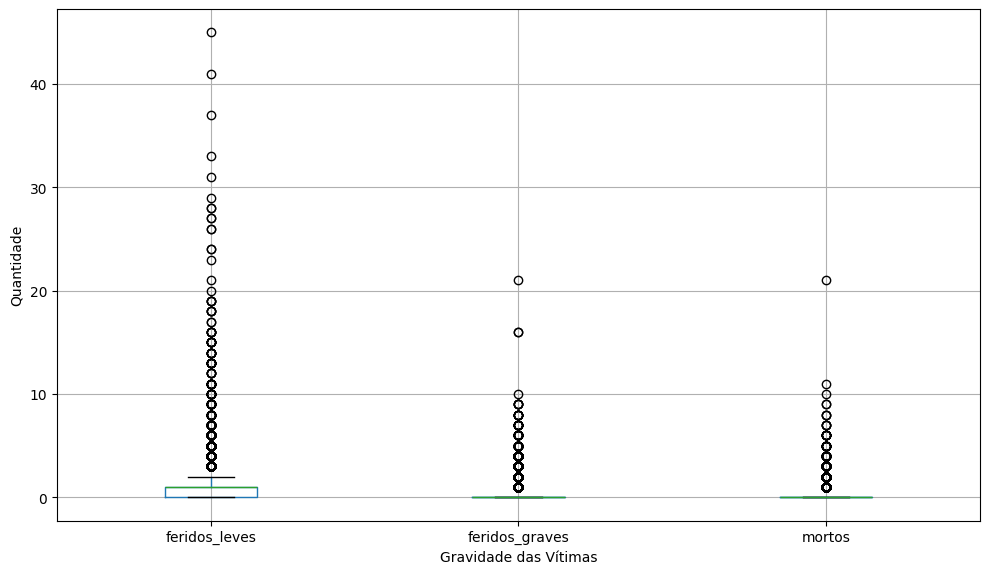

In [ ]:
#Gráfico boxplot com as colunas feridos_leves, feridos_graves e mortos agrupados pela coluna id

import matplotlib.pyplot as plt

# Criar o boxplot
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
df_agrupado.boxplot(column=['feridos_leves', 'feridos_graves', 'mortos'], figsize=(12, 8))
plt.suptitle('') # Remove o título padrão gerado pelo boxplot
plt.xlabel('Gravidade das Vítimas')
plt.ylabel('Quantidade')
plt.tight_layout() #ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
#Aplicação do algoritmo apriori

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Seleciona as colunas relevantes para a análise Apriori
colunas_apriori = ['classificacao_acidente','condicao_metereologica', 'feridos_leves', 'feridos_graves', 'mortos']
df_apriori = df_acidentes2017[colunas_apriori]

# Converte as colunas para o formato one-hot encoding
df_apriori = pd.get_dummies(df_apriori)

# Aplica o algoritmo Apriori
frequent_itemsets = apriori(df_apriori, min_support=0.07, use_colnames=True)

# Gera as regras de associação
rules = association_rules(frequent_itemsets, num_itemsets=len(df_apriori), metric="lift", min_threshold=1)

# Exibe as regras de associação
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(feridos_leves),(classificacao_acidente_Com Vítimas Feridas),0.321089,0.640944,0.307388,0.957329,1.493625,1.0,0.101588,8.414582,0.486791,0.469550,0.881159,0.718458
1,(classificacao_acidente_Com Vítimas Feridas),(feridos_leves),0.640944,0.321089,0.307388,0.479587,1.493625,1.0,0.101588,1.304561,0.920434,0.469550,0.233459,0.718458
2,(classificacao_acidente_Com Vítimas Feridas),(feridos_graves),0.640944,0.091532,0.080800,0.126065,1.377276,1.0,0.022134,1.039514,0.762913,0.123989,0.038012,0.504410
3,(feridos_graves),(classificacao_acidente_Com Vítimas Feridas),0.091532,0.640944,0.080800,0.882756,1.377276,1.0,0.022134,3.062472,0.301528,0.123989,0.673466,0.504410
4,(condicao_metereologica_Céu Claro),(classificacao_acidente_Com Vítimas Feridas),0.543448,0.640944,0.355425,0.654019,1.020400,1.0,0.007106,1.037792,0.043790,0.428757,0.036416,0.604277
5,(classificacao_acidente_Com Vítimas Feridas),(condicao_metereologica_Céu Claro),0.640944,0.543448,0.355425,0.554534,1.020400,1.0,0.007106,1.024887,0.055680,0.428757,0.024283,0.604277
6,(condicao_metereologica_Nublado),(classificacao_acidente_Com Vítimas Feridas),0.178707,0.640944,0.116210,0.650278,1.014564,1.0,0.001668,1.026692,0.017479,0.165201,0.025998,0.415794
7,(classificacao_acidente_Com Vítimas Feridas),(condicao_metereologica_Nublado),0.640944,0.178707,0.116210,0.181310,1.014564,1.0,0.001668,1.003179,0.039980,0.165201,0.003169,0.415794
8,"(condicao_metereologica_Céu Claro, feridos_leves)",(classificacao_acidente_Com Vítimas Feridas),0.173435,0.640944,0.166491,0.959964,1.497735,1.0,0.055329,8.968302,0.402056,0.256975,0.888496,0.609862
9,"(condicao_metereologica_Céu Claro, classificac...",(feridos_leves),0.355425,0.321089,0.166491,0.468428,1.458871,1.0,0.052368,1.277175,0.487978,0.326438,0.217022,0.493474
